<a href="https://colab.research.google.com/github/YifanXu1999/VAE/blob/master/AutoEnocderMNIST_500TrainWithDigit9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torch.utils.data.dataloader import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
!pip install tsne
from tsne import bh_sne

In [0]:
trainData = DataLoader(MNIST(root='./root', train=True, download=True, transform=transforms.ToTensor()), shuffle=True, batch_size=128)
testData = DataLoader(MNIST(root='./root', train=False, download=True, transform=transforms.ToTensor()), shuffle=True, batch_size=5000)

In [0]:
class AutoEnocder(nn.Module):
  def __init__(self, hidden_dim=500, latent_dim=500, norm_factor=1):
    super(AutoEnocder, self).__init__()
    self.encode_z = nn.Sequential(
        nn.Linear(784, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, latent_dim)
    )
    self.decode_output = nn.Sequential(
        nn.Linear(latent_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, 784),
        nn.Sigmoid()
    )
    self.norm_factor = norm_factor
  
  def encode(self, x_in):
    return (self.encode_z(x_in.view(-1, 784)) * self.norm_factor)
  
  def decode(self, z):
    return self.decode_output(z).view(-1, 1, 28, 28)
  
  def forward(self, x_in):
    z = self.encode(x_in)
    return self.decode(z)


In [0]:
def remove_imgs(imgs, labels, digits_to_remove):
  list_imgs = list(imgs)
  new_imgs_list = torch.tensor([])
  for i in range(len(list_imgs)):
    if labels[i] not in digits_to_remove:
      new_imgs_list = torch.cat([new_imgs_list, list_imgs[i]], 0)
  return  new_imgs_list.view(-1, 1, 28 ,28)
  

In [0]:
def train(model, optimizer, dataset, epochs=4):
  losses = []
  for epoch in range(epochs):
    for images, labels in dataset:
      x_in = remove_imgs(images, labels, [0, 1, 2, 3, 4, 5, 6, 7, 8])
      print(x_in.size())
      x_out = model(x_in)
      optimizer.zero_grad()
      loss = 0.5 * (x_out - x_in).pow(2).sum() / x_in.size(0)
      losses.append(loss)
      loss.backward()
      optimizer.step()
  return losses
model = AutoEnocder(norm_factor=1)
optimizer = torch.optim.Adam(model.parameters())

torch.Size([14, 1, 28, 28])
torch.Size([17, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([17, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([17, 1, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([11, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([11, 1, 28, 28])
torch.Size([17, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([16, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([8, 1, 28, 28])
torch.Size([17, 1, 28, 28])
torch.Size([9, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([11, 1, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([12, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([11, 1, 28, 28])
torch.Size([19, 1, 28, 28])
torch.Size([12, 1, 28, 28])
torch.Size([15, 1, 28, 28])
torch.Size([16, 1, 28, 28])
torch.Size([16, 1, 28, 28])
torch.Size([24, 1, 28, 28])
torch.Size([15, 1, 28, 28])
torch.Size([12, 1, 28, 28])
torch.Size([18, 1, 28,

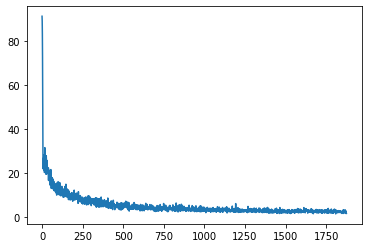

In [159]:
losses = train(model, optimizer, trainData)
plt.plot(losses)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.axis('off')
    plt.show()

imgs, label = iter(testData).next()

def add_noise(x, noise_factor=0.2):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x
def visualize(images, label, model):
  x_in = images
  x_out = model(x_in.view(-1, 28 * 28)).data
  z = model.encode(x_in)
  imshow(make_grid(x_in[0:16]))
  imshow(make_grid(x_out[0:16]))
  return z.data.numpy()

torch.Size([5000, 1, 28, 28])


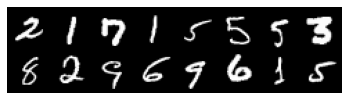

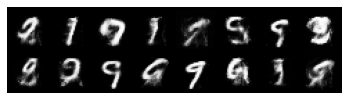

In [161]:
imgs, label = iter(testData).next()
print(imgs.size())
imgs = torch.FloatTensor(add_noise(imgs.data.numpy(), 0))
z = visualize(imgs, label, model)

In [0]:
z = bh_sne(np.float64(z))

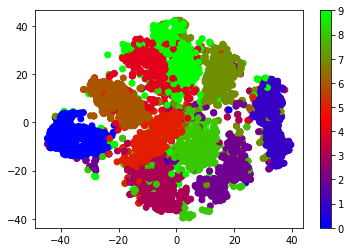

In [163]:
plt.scatter(z[:, 0], z[:, 1], c=label, cmap='brg')
plt.colorbar()